Maximum accuracy:  1.0
Maximum validation accuracy:  0.9969099760055542


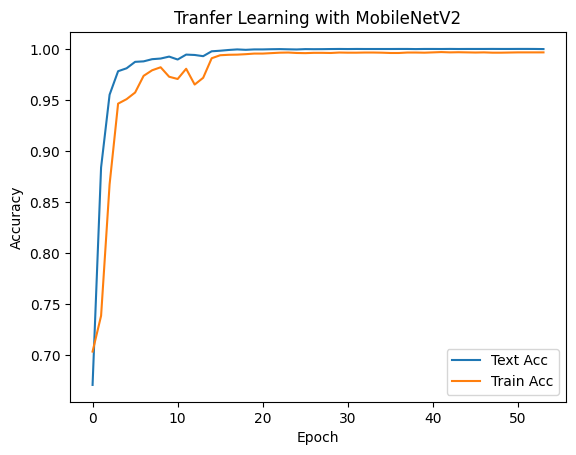

In [11]:
import json
# Import matplotlib
import matplotlib.pyplot as plt

# JSON file
f = open ('training-results/MobileNetV2.json', "r")
# Reading from file
data = json.loads(f.read())

# Plot the graph using ['accuracy'] and ['val_accuracy']
plt.plot(data['accuracy'])
plt.plot(data['val_accuracy'])
plt.title('Tranfer Learning with MobileNetV2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend({'Train Acc', 'Text Acc'}, loc='lower right')

# Print the maximum accuracy
print('Maximum accuracy: ', max(data['accuracy']))
print('Maximum validation accuracy: ', max(data['val_accuracy']))


Minimum loss:  4.534683102974668e-05
Minimum validation loss:  0.005713172722607851


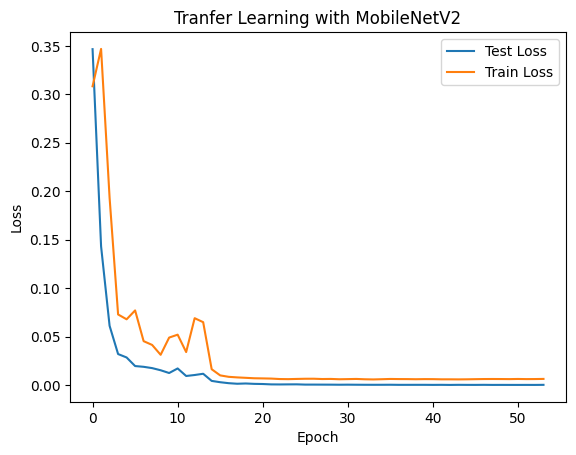

In [12]:
# Print the loss
plt.plot(data['loss'])
plt.plot(data['val_loss'])
plt.title('Tranfer Learning with MobileNetV2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend({'Train Loss', 'Test Loss'}, loc='upper right')

# Print the minimum loss
print('Minimum loss: ', min(data['loss']))
print('Minimum validation loss: ', min(data['val_loss']))


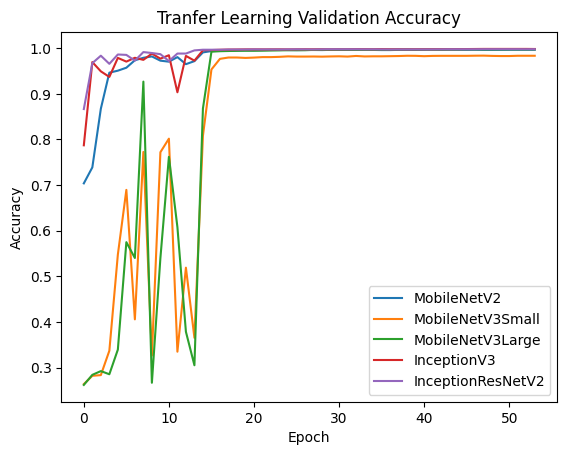

In [3]:
import json
import matplotlib.pyplot as plt

modelNames = ['MobileNetV2', 'MobileNetV3Small', 'MobileNetV3Large', 'InceptionV3', 'InceptionResNetV2']

data = []
# import the JSON files
for modelName in modelNames:
		f = open ('training-results/' + modelName + '.json', "r")
		data.append(json.loads(f.read()))

# Plot the graph using ['accuracy'] and ['val_accuracy']

for d in data:
		plt.plot(d['val_accuracy'], label=d['BaseModelName'])

plt.title('Tranfer Learning Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()



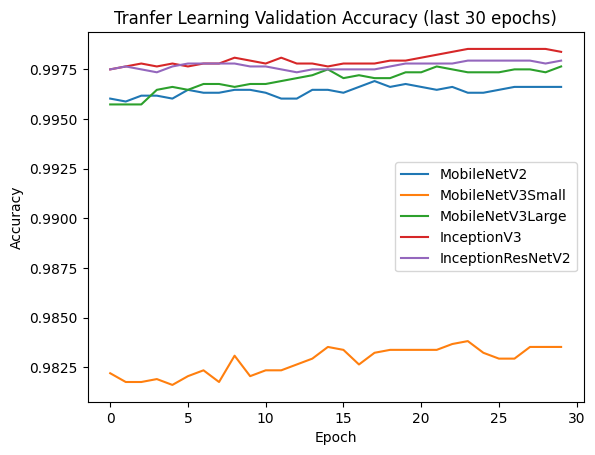

In [5]:
# Plot the last 30 epochs
for d in data:
		plt.plot(d['val_accuracy'][-30:], label=d['BaseModelName'])

plt.title('Tranfer Learning Validation Accuracy (last 30 epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [7]:
# print the highest validation accuracy and the lowest validation loss for each model
for d in data:
		print(d['BaseModelName'])
		print('Maximum validation accuracy:\t\t', max(d['val_accuracy']))
		print('Minimum validation loss:\t\t', min(d['val_loss']))
		print('')

MobileNetV2
Maximum validation accuracy:		 0.9969099760055542
Minimum validation loss:		 0.005713172722607851

MobileNetV3Small
Maximum validation accuracy:		 0.983814001083374
Minimum validation loss:		 0.031580064445734024

MobileNetV3Large
Maximum validation accuracy:		 0.9976456761360168
Minimum validation loss:		 0.003910205326974392

InceptionV3
Maximum validation accuracy:		 0.9985285401344299
Minimum validation loss:		 0.0023784858640283346

InceptionResNetV2
Maximum validation accuracy:		 0.997939944267273
Minimum validation loss:		 0.003877741051837802

